In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read cleaned_train_with_amenities.csv into a DataFrame
train_df = pd.read_csv('../data/cleaned_train_with_amenities.csv')

C:\Users\hoonc\AppData\Local\Temp\ipykernel_11560\3555596934.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/cleaned_train_with_amenities.csv')


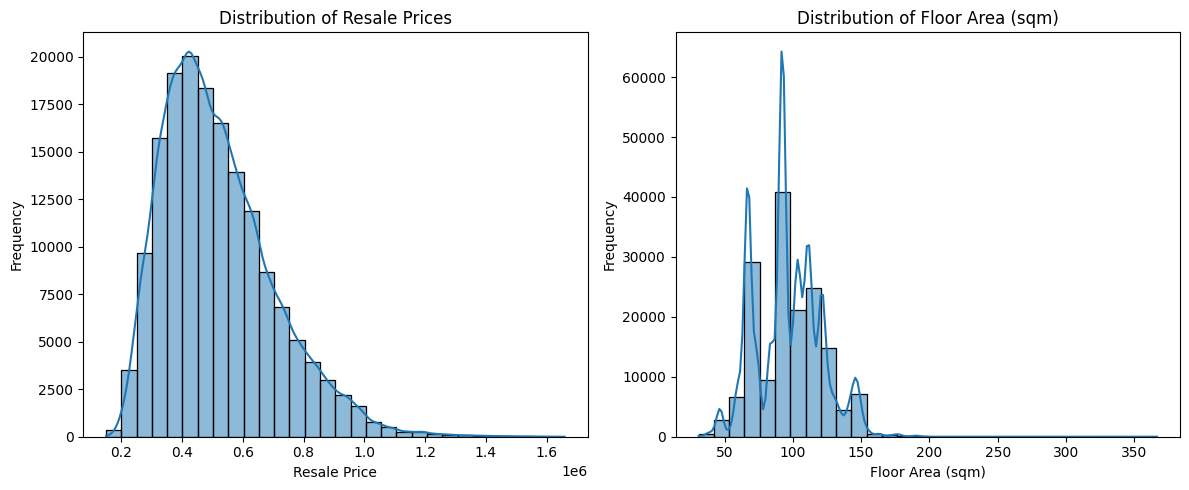

In [14]:
# plot distribution of 2 plots: resale prices and floor area sqm
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df['resale_price'], bins=30, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(train_df['floor_area_sqm'], bins=30, kde=True)
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# count number of records with floor area sqm greater than 200
large_flats_count = (train_df['floor_area_sqm'] > 200).sum()
print(f'Number of records with floor area greater than 200 sqm: {large_flats_count}')

Number of records with floor area greater than 200 sqm: 5


In [ ]:
# Clean up subzone names by removing whitespace
train_df['subzone'] = train_df['subzone'].str.strip()
print(train_df['subzone'].unique())
print(len(train_df['subzone'].unique()))

# Remove hyphens in flat types for consistency and lower capitalization
train_df['flat_type'] = train_df['flat_type'].str.replace('-', ' ')
train_df['flat_type'] = train_df['flat_type'].str.lower()

['woodlands east' 'marymount' 'saujana' 'punggol field' 'trafalgar'
 'clementi north' 'fajar' 'bedok north' 'yishun south' 'fernvale' 'dover'
 'waterway east' 'bukit batok central' 'woodlands south'
 'sengkang town centre' 'pasir ris drive' 'toa payoh central'
 'kampong ubi' 'punggol town centre' 'matilda' 'yishun east' 'ghim moh'
 'potong pasir' 'boon teck' 'tampines west' 'telok blangah drive'
 'hong kah north' 'chong boon' 'sembawang east' 'tiong bahru station'
 'kebun bahru' 'keat hong' 'jurong west central' 'clementi central'
 'north coast' 'braddell' 'tampines east' 'woodlands west' 'rivervale'
 'anchorvale' 'balestier' 'hong kah' 'simei' 'geylang bahru' 'midview'
 'sembawang central' 'macpherson' 'lorong ah soo' 'pasir ris central'
 'cheng san' 'mei chin' 'bendemeer' 'choa chu kang north'
 'choa chu kang central' 'boon lay place' 'margaret drive' 'woodgrove'
 'tiong bahru' 'tampines north' 'bukit batok south' 'upper paya lebar'
 'senja' 'teck whye' 'peng siang' 'yishun west' 'bi

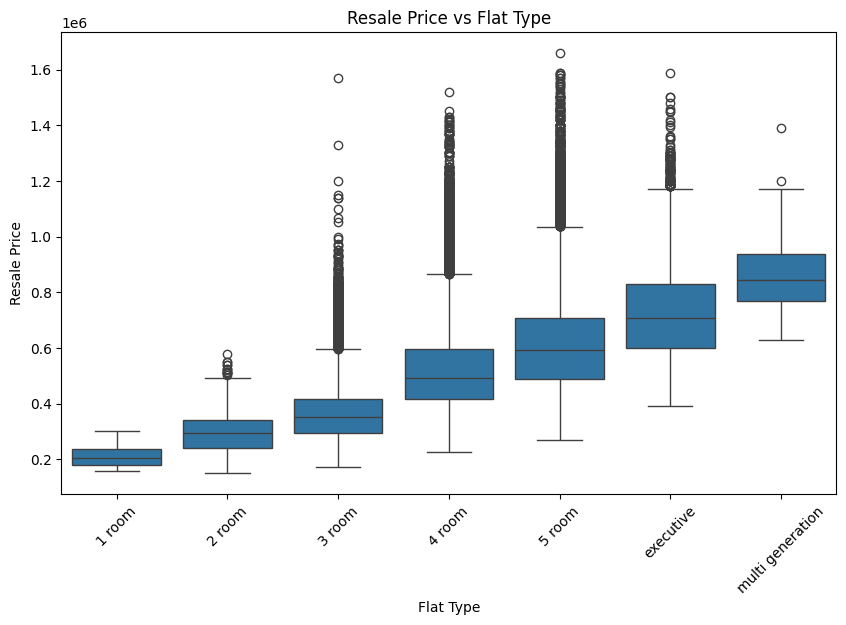

In [ ]:
# Plot resale price vs flat type, in ascending order of mean resale price
flat_type_means = train_df.groupby('flat_type')['resale_price'].mean().sort_values()
ordered_flat_types = flat_type_means.index.tolist()

plt.figure(figsize=(10, 6))
sns.boxplot(x='flat_type', y='resale_price', data=train_df, order=ordered_flat_types)
plt.title('Resale Price vs Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

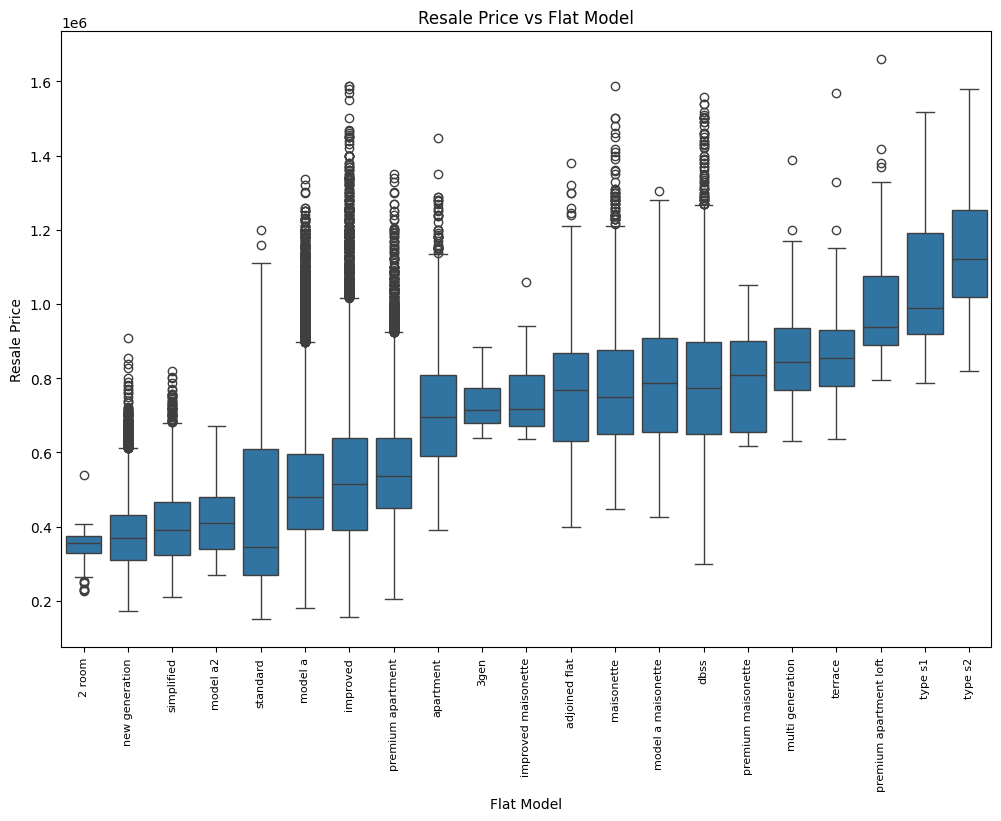

In [11]:
# print mean of resale prices for each flat model, in ascending order
flat_model_means = train_df.groupby('flat_model')['resale_price'].mean().sort_values()
# Plot resale price vs flat model by boxplot, in ascending order of mean resale price
plt.figure(figsize=(12, 8))
order = flat_model_means.index.tolist()
sns.boxplot(x='flat_model', y='resale_price', data=train_df, order=order)
plt.title('Resale Price vs Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Resale Price')
plt.xticks(rotation=90, fontsize=8)
plt.show()

